In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.show()
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=7)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

In [3]:
from core import StudentModel, CurriculumAgent
from utils import (
    generate_synthetic_tasks,
    evaluate_on_target,
    format_state_dict,
    plot_learning_curve,
    plot_concept_mastery
)

In [4]:
import numpy as np

In [5]:
concepts = ['algebra', 'geometry', 'probability', 'calculus', 'statistics']
task_pool = generate_synthetic_tasks(concepts, num_tasks=15)
target_tasks = generate_synthetic_tasks(concepts, num_tasks=5)

In [6]:
# Initialize student and Agent
student = StudentModel(concept_list=concepts, learning_rate=0.1)
agent = CurriculumAgent(concept_list=concepts, task_pool=task_pool)

Episode 10: Total Reward = 3.74, Target Evaluation = 0.75
Episode 20: Total Reward = 3.53, Target Evaluation = 0.68
Episode 30: Total Reward = 3.69, Target Evaluation = 0.76
Episode 40: Total Reward = 3.21, Target Evaluation = 0.67
Episode 50: Total Reward = 3.62, Target Evaluation = 0.77
Episode 60: Total Reward = 3.32, Target Evaluation = 0.68
Episode 70: Total Reward = 3.28, Target Evaluation = 0.67
Episode 80: Total Reward = 3.31, Target Evaluation = 0.71
Episode 90: Total Reward = 3.38, Target Evaluation = 0.63
Episode 100: Total Reward = 3.13, Target Evaluation = 0.68


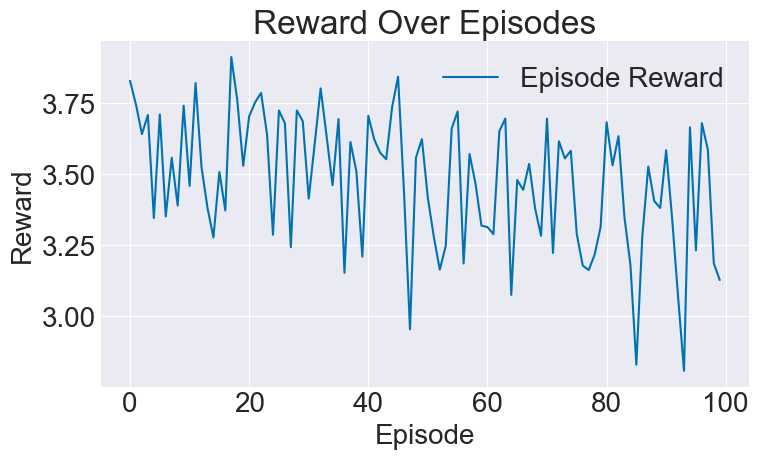

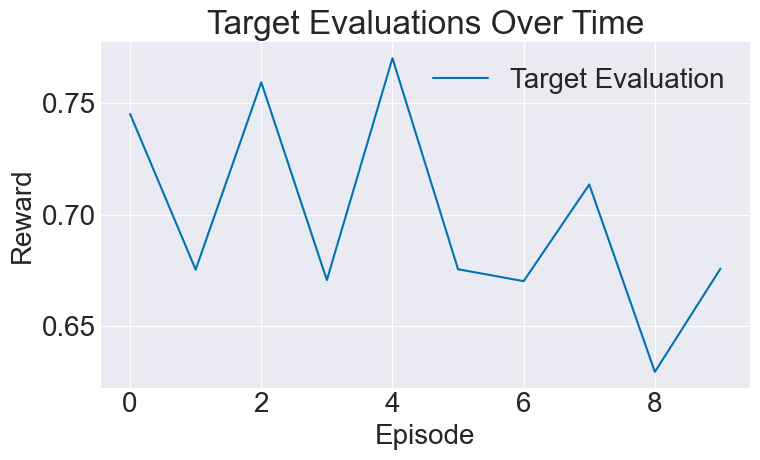

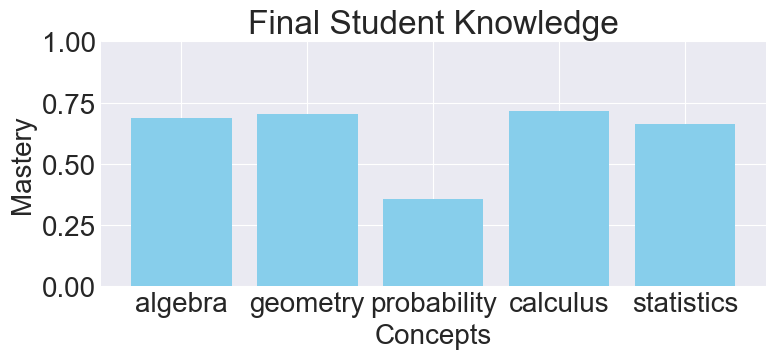

In [11]:
# train over episodes
num_episodes = 100
rewards = []
evaluations = []

for episode in range(num_episodes):
    student.reset()
    state = student.get_state()
    total_reward = 0

    for _ in range(10): # steps per episode
        task = agent.select_task(state)
        reward = student.train_on_task(task)
        total_reward += reward
        next_state = student.get_state()
        done = False 
        agent.update_q(state, task, reward, next_state, done)
        state = next_state

    rewards.append(total_reward)
    # print progress
    if (episode + 1) % 10 == 0:
        avg_eval = evaluate_on_target(student, target_tasks)
        evaluations.append(avg_eval)
        print(f"Episode {episode + 1}: Total Reward = {total_reward:.2f}, Target Evaluation = {avg_eval:.2f}")

# plot reward and evaluations
plot_learning_curve(rewards, label="Episode Reward", title="Reward Over Episodes")
plot_learning_curve(evaluations, label="Target Evaluation", title="Target Evaluations Over Time")

# plot final knowledge master to show which concepts student learned best
plot_concept_mastery(student.knowledge, title="Final Student Knowledge")